## Reddit API Web Scraping 

###### a part of code and ideas from github: https://github.com/dominiczrong

In [1]:
# Import Basic Packages
import requests
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 999)

In [2]:
url ='https://www.reddit.com/r/toronto.json'
headers = {'User-agent': 'GA boy'}
res = requests.get(url, headers=headers)
res.status_code

200

In [114]:
# 200 means that the request has successed.

In [115]:
# Converting the data into a format similar to a dictionary using the .json() method
url_dict = res.json()


In [4]:
url_dict['data'].keys()


dict_keys(['after', 'dist', 'modhash', 'geo_filter', 'children', 'before'])

In [5]:
# Shows the subreddit topic for the first post

url_dict['data']['children'][0]['data']['subreddit']


'toronto'

In [6]:
# Shows the title of the second post
url_dict['data']['children'][1]['data']['title']


'STORYTIME - Urban farming in Toronto year 6'

In [7]:
# Shows the selftext of the first post
url_dict['data']['children'][0]['data']['selftext']


'June 14\n\nGreenpeace New Volunteer Orientation\n\nhttps://www.eventbrite.ca/e/greenpeace-new-volunteer-orientation-tickets-358935715387?aff=ebdssbdestsearch\n\nHome is where the Identity is: Expression within Historic Interiors @ Reference Library\n\nhttps://www.eventbrite.ca/e/home-is-where-the-identity-is-expression-within-historic-interiors-tickets-335792844437?aff=ebdssbdestsearch\n\nOnline craft night\n\n[https://www.meetup.com/eventsonline/events/286485872/](https://www.meetup.com/eventsonline/events/286485872/)\n\nBlue Jays vs Orioles @ SkyDome\n\n[https://www.mlb.com/bluejays/schedule/2022-06](https://www.mlb.com/bluejays/schedule/2022-06)\n\nScience Is A Drag @ Opera House\n\nhttps://www.eventbrite.ca/e/science-is-a-drag-tickets-348894923107?aff=ebdssbcitybrowse\n\nDrag show @ Bar Cathedral\n\nhttps://www.eventbrite.ca/e/drag-on-the-esplanade-tickets-343380669827?aff=ebdssbcitybrowse&amp;keep_tld=1\n\nKingdom Tour: Maverick City Music x Kirk Franklin @ Budweiser Stage\n\n[ht

In [116]:
# Convert these subreddit posts into a pandas dataframe
url_posts = [p['data'] for p in url_dict['data']['children']]
print(str('The number of subreddit posts in this dataframe is: '), len(pd.DataFrame(url_posts)))
pd.DataFrame(url_posts).head()

The number of subreddit posts in this dataframe is:  25


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,author_is_blocked,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data
0,None,toronto,Ahhh! Stay safe everyone,t2_62txgv32,False,None,0,False,Thunderstorm!!!!!,[],r/toronto,False,6,linkflair-flair-discussion,0,NaN,None,False,t3_vdrm38,False,light,0.71,None,public,51,0,{},NaN,None,False,[],None,False,False,None,{},Discussion,False,51,None,False,False,self,False,None,[],{},None,True,None,1.655401e+09,text,6,None,None,text,self.toronto,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,False,False,False,False,False,[],[],False,ae79e452-9cc0-11e7-b690-0ee40dd4f03a,False,False,False,None,[],False,None,None,None,t5_2qi63,False,None,None,#7f81ed,vdrm38,True,None,BurnaBoy199322,None,67,True,all_ads,False,[],False,None,/r/toronto/comments/vdrm38/thunderstorm/,all_ads,False,https://www.reddit.com/r/toronto/comments/vdrm...,528029,1.655401e+09,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN
1,None,toronto,It feels like there's been 3 types of days in ...,t2_10wus851,False,None,0,False,Does anyone feel like the weather in June has ...,[],r/toronto,False,6,linkflair-flair-discussion,0,NaN,None,False,t3_vepbht,False,light,0.47,None,public,0,0,{},NaN,None,False,[],None,False,False,None,{},Discussion,False,0,None,False,False,self,False,None,[],{},None,True,None,1.655498e+09,text,6,None,None,text,self.toronto,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,False,True,False,False,False,[],[],False,ae79e452-9cc0-11e7-b690-0ee40dd4f03a,False,False,False,None,[],False,None,None,None,t5_2qi63,False,None,None,#7f81ed,vepbht,True,None,VerryBonds,None,37,True,all_ads,False,[],False,None,/r/toronto/comments/vepbht/does_anyone_feel_li...,all_ads,False,https://www.reddit.com/r/toronto/comments/vepb...,528029,1.655498e+09,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN
2,None,toronto,,t2_pzwbz,False,None,0,False,The Star saw the Sherman crime-scene and autop...,[],r/toronto,False,6,linkflair-flair-article,0,93.0,None,False,t3_vdk0i2,False,light,0.92,None,public,142,0,{},140.0,None,False,[],None,False,False,None,{},Article,False,142,None,False,False,https://b.thumbs.redditmedia.com/L5dErbJi6bkDD...,False,None,[],{},None,False,None,1.655380e+09,text,6,None,None,text,thestar.com,True,None,None,None,None,None,False,False,False,False,False,[],[],False,e4d14082-b60c-11e5-bbd7-0e041cdfb86f,False,False,False,None,[],False,None,None,None,t5_2qi63,False,None,None,#66bf7c,vdk0i2,True,None,LZBUM,None,94,False,all_ads,False,[],False,None,/r/toronto/comments/vdk0i2/the_star_saw_the_sh...,all_ads,False,https:/

In [9]:
# Unique IDs/names given to each post in the subreddit
pd.DataFrame(url_posts)['name']

0     t3_vbbhqe
1     t3_vbpklg
2     t3_vfe6z6
3     t3_vf50op
4     t3_vfhzzn
5     t3_vf5fat
6     t3_vf540x
7     t3_vfjnl5
8     t3_vfhecw
9     t3_vf7uiz
10    t3_vfh36a
11    t3_vfk3x6
12    t3_vfb67l
13    t3_vf8kop
14    t3_vf7420
15    t3_vfboh2
16    t3_vfg4sd
17    t3_vfaetp
18    t3_vffc5l
19    t3_vem47k
20    t3_vfat49
21    t3_vf3qix
22    t3_vf6s80
23    t3_vf3bmv
24    t3_vevfog
25    t3_vf5867
26    t3_vf3s7p
Name: name, dtype: object

In [120]:
# The after column is an indication of the name of the last post on a subreddit on a particular page
url_dict['data']['after']

't3_vd8s8d'

In [121]:
# Generate the url that gives us the next page with the next 25 posts
url + '?after=' + url_dict['data']['after']


'https://www.reddit.com/r/toronto.json?after=t3_vd8s8d'

In [124]:
# Scraping Toronto Subreddit Data

trt_posts=[] # Storing Software Engineering Subreddit Posts
after = None # after will be empty for the first iteration
trt_url = 'https://www.reddit.com/r/toronto.json'

for a in range(50): #range number will indicate how many pages of 25 posts to scrape
    if after == None:
        current_url = trt_url
    else:
        current_url = trt_url + '?after=' + after
    print(current_url)
        
    res = requests.get(current_url, headers={'User-agent': 'GA Boy'})
    
    if res.status_code == 200: #to check if request is successful
        current_dict = res.json()
        current_posts = [p['data'] for p in current_dict['data']['children']]
        trt_posts.extend(current_posts) # Adding all posts scraped into this list
        after = current_dict['data']['after']
    else:
        print(results.status_code)
        break
        
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,6)
    print(sleep_duration)
    time.sleep(sleep_duration)
    time.sleep(1) #seconds to sleep

https://www.reddit.com/r/toronto.json
5
https://www.reddit.com/r/toronto.json?after=t3_vfllp5
5
https://www.reddit.com/r/toronto.json?after=t3_vez6i8
3
https://www.reddit.com/r/toronto.json?after=t3_vezu3u
4
https://www.reddit.com/r/toronto.json?after=t3_vcy4ya
3
https://www.reddit.com/r/toronto.json?after=t3_vcjkdg
3
https://www.reddit.com/r/toronto.json?after=t3_vbkfeu
4
https://www.reddit.com/r/toronto.json?after=t3_vbco7c
2
https://www.reddit.com/r/toronto.json?after=t3_va9luu
2
https://www.reddit.com/r/toronto.json?after=t3_v9c7js
2
https://www.reddit.com/r/toronto.json?after=t3_v9cki5
6
https://www.reddit.com/r/toronto.json?after=t3_v8x80a
5
https://www.reddit.com/r/toronto.json?after=t3_v7rsgd
3
https://www.reddit.com/r/toronto.json?after=t3_v8zbsd
4
https://www.reddit.com/r/toronto.json?after=t3_v7d5cr
5
https://www.reddit.com/r/toronto.json?after=t3_v66nln
2
https://www.reddit.com/r/toronto.json?after=t3_v5371a
6
https://www.reddit.com/r/toronto.json?after=t3_v4sus4
4
https://

In [125]:
print(str('The total number of subreddit posts scrapped was:'), len(trt_posts))


The total number of subreddit posts scrapped was: 1249


In [218]:
df = pd.DataFrame(trt_posts)
df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,subreddit_type,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,call_to_action,author_flair_text,treatment_tags,visited,removed_by,mod_note,distinguished,subreddit_id,author_is_blocked,mod_reason_by,num_reports,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,is_gallery,media_metadata,gallery_data,author_cakeday
0,None,toronto,June 14\n\nGreenpeace New Volunteer Orientatio...,t2_7b1bm,False,None,0,False,Things to do: June 13 - June 19,[],r/toronto,False,6,linkflair-flair-discussion,0,0.0,None,False,t3_vbbhqe,False,light,0.92,None,31,1,{},0.0,5369b6a0-524b-11e3-b499-12313b074434,False,[],None,False,False,,{},Discussion,False,31,None,False,False,self,1.65558e+09,koreatown,[],{},self,None,True,public,1.655125e+09,text,6,None,None,text,self.toronto,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,False,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,ae79e452-9cc0-11e7-b690-0ee40dd4f03a,False,False,False,,Koreatown,[],False,None,None,None,t5_2qi63,False,None,None,None,#7f81ed,vbbhqe,True,None,sprungy,None,16,True,all_ads,False,[],False,dark,/r/toronto/comments/vbbhqe/things_to_do_june_1...,all_ads,True,https://www.reddit.com/r/toronto/comments/vbbh...,528060,1.655125e+09,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,toronto,,t2_ivmpg,False,None,1,False,STORYTIME - Urban farming in Toronto year 6,[],r/toronto,False,6,linkflair-flair-discussion,0,78.0,None,False,t3_vbpklg,False,light,0.99,None,684,5,"{'content': '&lt;iframe class=""embedly-embed"" ...",140.0,None,False,[],"{'type': 'imgur.com', 'oembed': {'provider_url...",False,False,None,"{'content': '&lt;iframe class=""embedly-embed"" ...",Discussion,False,684,None,False,True,https://b.thumbs.redditmedia.com/FojMcj95OYKxl...,False,None,[],"{'gid_1': 2, 'gid_2': 1}",link,None,False,public,1.655163e+09,text,6,None,None,text,imgur.com,False,None,None,None,None,None,False,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,ae79e452-9cc0-11e7-b690-0ee40dd4f03a,False,False,False,NaN,None,[],False,None,None,None,t5_2qi63,False,None,None,None,#7f81ed,vbpklg,True,None,Samjaxxson,None,109,True,all_ads,False,[],False,None,/r/toronto/comments/vbpklg/storytime_urban_far...,all_ads,True,https://imgur.com/gallery/OrGW0iI,528060,1.655163e+09,1,"{'type': 'imgur.com', 'oembed': {'provider_url...",False,https://imgur.com/gallery/OrGW0iI,NaN,NaN,NaN,NaN,NaN,NaN
2,None,toronto,,t2_m1i3e,False,None,0,False,A reminder to clean your lint traps and exhausts,[],r/toronto,False,6,linkflair-flair-video,0,140.0,None,False,t3_vfe6z6,False,light,0.96,None,655,0,

# Data Cleaning


In [192]:
# Import Basic Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)

# Import Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib_venn import venn2

# Import NLP Packages
import re
import nltk
from nltk import FreqDist, bigrams
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup


# Import sklearn Packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [219]:
# Overview of Missing Data in swe_df
missing_data = df.isnull().sum()/df.shape[0]
print(str('The number of columns with that have more than 50% consisting of null values is:'), len(missing_data[missing_data>0.5]))
missing_data[missing_data>0.5].sort_values()

The number of columns with that have more than 50% consisting of null values is: 35


author_flair_text_color          0.697358
author_flair_text                0.698159
author_flair_css_class           0.733387
author_flair_template_id         0.767814
selftext_html                    0.873499
secure_media                     0.900721
media                            0.900721
author_flair_background_color    0.917534
media_metadata                   0.966373
distinguished                    0.966373
crosspost_parent                 0.973579
crosspost_parent_list            0.973579
is_gallery                       0.975180
gallery_data                     0.975180
call_to_action                   0.995997
category                         0.995997
author_cakeday                   0.997598
banned_at_utc                    1.000000
mod_reason_title                 1.000000
top_awarded_type                 1.000000
approved_by                      1.000000
content_categories               1.000000
removed_by_category              1.000000
banned_by                        1

#### Keep the variables we care about the most

In [220]:
object_cols = ['subreddit', 'selftext', 'title']


In [221]:
df.select_dtypes(include='number').head()


,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
0,0,6,0,0.0,0.92,31,1,0.0,31,1.655125e+09,6,16,528060,1.655125e+09,0
1,1,6,0,78.0,0.99,684,5,140.0,684,1.655163e+09,6,109,528060,1.655163e+09,1
2,0,6,0,140.0,0.96,655,0,140.0,655,1.655583e+09,6,98,528060,1.655583e+09,0
3,0,6,0,78.0,0.98,159,0,140.0,159,1.655595e+09,6,32,528060,1.655595e+09,0
4,0,6,0,111.0,0.99,1083,4,140.0,1083,1.655555e+09,6,49,528060,1.655555e+09,0


In [222]:
# Selected numerical columns
numerical_cols = ['upvote_ratio', 'ups', 'num_comments', 'subreddit_subscribers']

In [223]:
# Creation of Software Engineering DataFrame with only the selected columns
df = df[object_cols + numerical_cols]

# Check on missing value
df.isnull().sum()


subreddit                0
selftext                 0
title                    0
upvote_ratio             0
ups                      0
num_comments             0
subreddit_subscribers    0
dtype: int64

In [224]:
df.head()

,subreddit,selftext,title,upvote_ratio,ups,num_comments,subreddit_subscribers
0,toronto,June 14\n\nGreenpeace New Volunteer Orientatio...,Things to do: June 13 - June 19,0.92,31,16,528060
1,toronto,,STORYTIME - Urban farming in Toronto year 6,0.99,684,109,528060
2,toronto,,A reminder to clean your lint traps and exhausts,0.96,655,98,528060
3,toronto,,Rooftop Fire in Townhouse Complex (Yonge/401),0.98,159,32,528060
4,toronto,,Some hand drawn Toronto map art I did a little...,0.99,1083,49,528060


In [226]:
#lower case 
df.title=df['title'].str.lower()
## remove unnecessary punctuation
df['title']= df.title.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~''’]','')

In [228]:
def plot_frequency_of_word(text):
    review=text.astype(str).str.cat()
    review=word_tokenize(review)
    stop = stopwords.words("english")
    stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',',',', ','.',
                '0','1','2','3','4','5','6','7','8','9','10',"n't",'s',"'s","'ve",'I','‘',"'","—"])
    updated_text=[token for token in review if token not in stop]
    
    fd = FreqDist()
    
    for word in updated_text:
        fd[word]=fd[word]+ 1
        
    print(fd.most_common(50))
# Plotting the top 50 most frequent words
    plt.figure(figsize = (15, 8))
    plt.title("The most frequent words in subreddit 'Toronto' (Top 50)")
    fd.plot(50);

In [229]:
def plot_frequency_bigrams(text):
    from nltk import bigrams
    review=text.astype(str).str.cat()
    review=word_tokenize(review)
    stop = stopwords.words("english")
    stop.extend(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',',',', ','.',
                '1','2','3','4','5','6','7','8','9','10',"n't",'s',"'s","'ve"])
    updated_text=[token for token in review if token not in stop]
    bigrams = bigrams(updated_text)

    fd = FreqDist()
    
    for word in bigrams:
        fd[word]=fd[word]+ 1
        
    print(fd.most_common(20))
# Plotting the top 50 most frequent words
    plt.figure(figsize = (15, 8))
    fd.plot(20);

[('toronto', 262), ('police', 61), ('ontario', 54), ('june', 44), ('daily', 42), ('city', 38), ('may', 34), ('jun', 33), ('says', 32), ('people', 31), ('park', 30), ('new', 30), ('amp', 29), ('last', 28), ('pearson', 28), ('like', 27), ('first', 26), ('public', 26), ('street', 25), ('prices', 24), ('open', 22), ('housing', 22), ('one', 21), ('ttc', 21), ('since', 19), ('today', 19), ('end', 19), ('canada', 19), ('airport', 19), ('could', 18), ('found', 18), ('market', 18), ('cbc', 18), ('time', 18), ('bay', 17), ('steve', 17), ('downtown', 17), ('free', 17), ('high', 17), ('car', 17), ('rainbow', 17), ('night', 16), ('2022', 16), ('say', 16), ('st', 16), ('road', 16), ('covid19', 16), ('fire', 15), ('health', 15), ('cat', 15)]


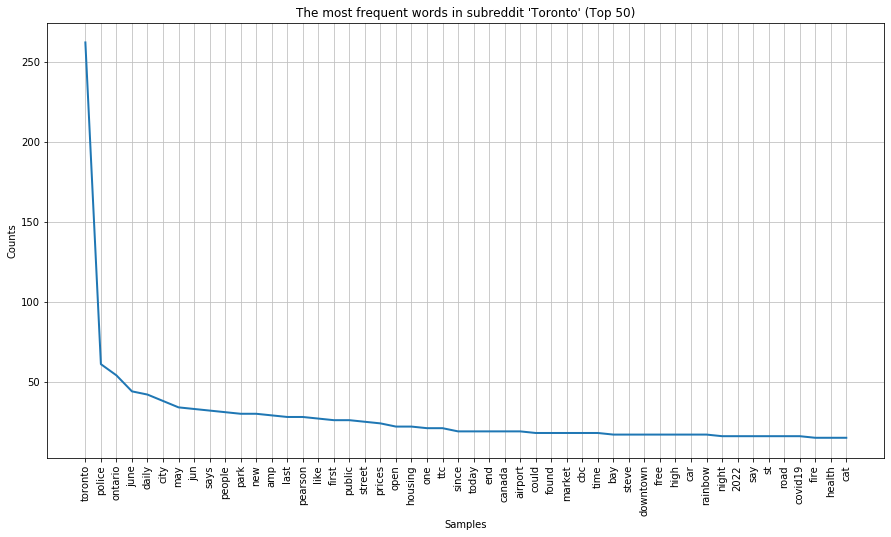

In [230]:
plot_frequency_of_word(df['title'])

#### It is very interesting to see that except for "Toronto",  "police" is the most frequent word appearing in the Reddit titles. 

[(('daily', 'jun'), 29), (('toronto', 'police'), 18), (('pearson', 'airport'), 14), (('daily', 'may'), 13), (('toronto', 'city'), 11), (('doug', 'ford'), 9), (('toronto', 'pearson'), 8), (('2022', 'steve'), 7), (('housing', 'crisis'), 7), (('toronto', 'food'), 7), (('food', 'safety'), 7), (('safety', 'inspectors'), 7), (('find', 'serious'), 7), (('serious', 'health'), 7), (('health', 'violations'), 7), (('doors', 'open'), 7), (('blue', 'jays'), 6), (('cn', 'tower'), 6), (('sexual', 'assault'), 6), (('use', 'force'), 6)]


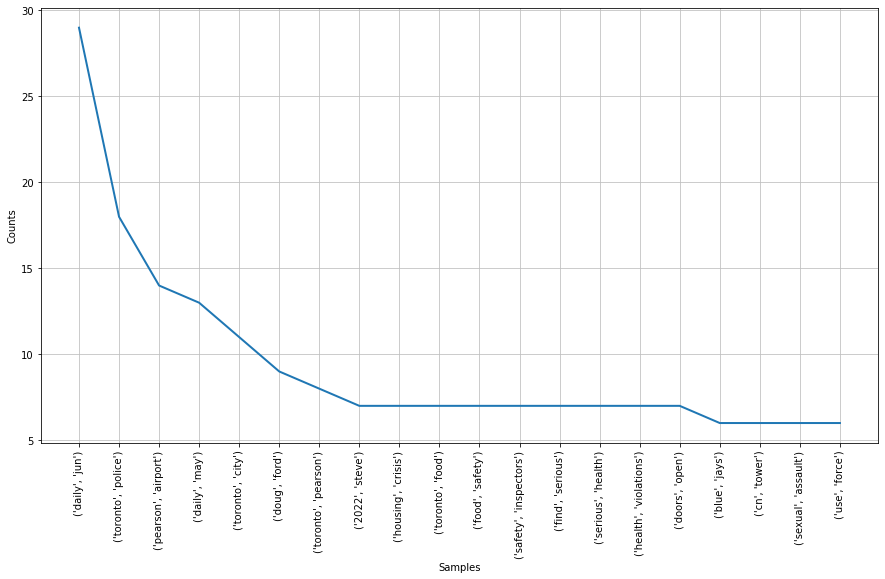

In [231]:
plot_frequency_bigrams(df['title'])

#### We can find that "daily June", "Toronto police", "Pearson airport" are the most frequent bigrams.  

## After exploring the unigrams and bigrams frequencies in title. I will explore the content in detail. 

In [235]:
#lower case 
df['selftext']=df['selftext'].str.lower()
## remove unnecessary punctuation
df['selftext']= df.selftext.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~''’]','')

[('toronto', 257), ('post', 223), ('title', 165), ('comments', 164), ('author', 162), ('please', 151), ('comedy', 144), ('thread', 132), ('june', 118), ('free', 104), ('day', 91), ('remember', 90), ('anyone', 89), ('best', 86), ('posts', 85), ('new', 77), ('get', 61), ('city', 59), ('end', 58), ('around', 57), ('people', 57), ('two', 56), ('tickets', 56), ('also', 55), ('feel', 54), ('make', 54), ('use', 54), ('stay', 53), ('selling', 52), ('talk', 49), ('contact', 47), ('tonight', 47), ('daily', 47), ('outside', 47), ('mind', 47), ("'re", 47), ('show', 46), ('general', 46), ('comment', 45), ('questions', 45), ('know', 44), ('subreddits', 44), ('one', 43), ('purposes', 43), ('based', 43), ('visit', 43), ('generally', 43), ('helpful', 43), ('behaviour', 43), ('rtoronto', 43)]


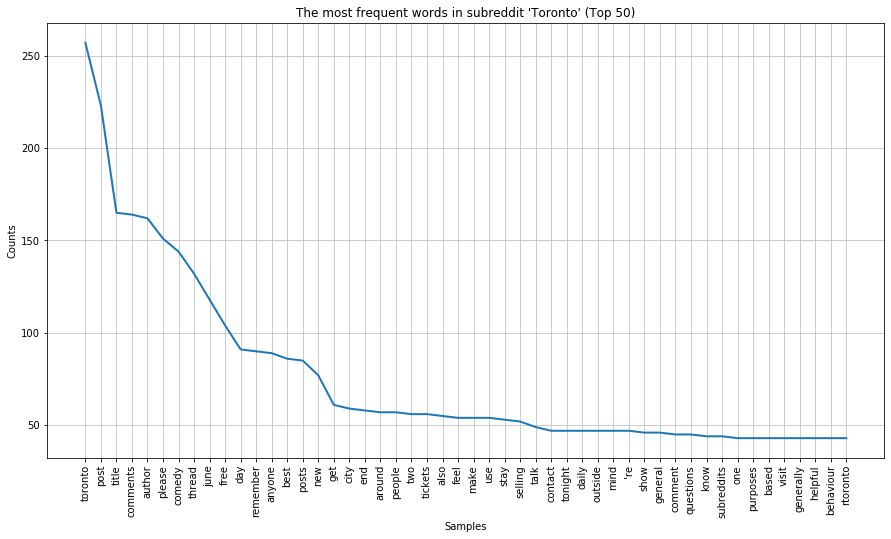

In [236]:
plot_frequency_of_word(df['selftext'])

[(('post', 'title'), 162), (('title', 'author'), 162), (('author', 'comments'), 162), (('feel', 'free'), 46), (('please', 'contact'), 45), (('toronto', 'daily'), 42), (('daily', 'thread'), 42), (('thread', 'thread'), 42), (('thread', 'serves'), 42), (('serves', 'two'), 42), (('two', 'purposes'), 42), (('purposes', 'collect'), 42), (('collect', 'make'), 42), (('make', 'visible'), 42), (('visible', 'new'), 42), (('new', 'posts'), 42), (('posts', 'smaller'), 42), (('smaller', 'toronto'), 42), (('toronto', 'based'), 42), (('based', 'subreddits'), 42)]


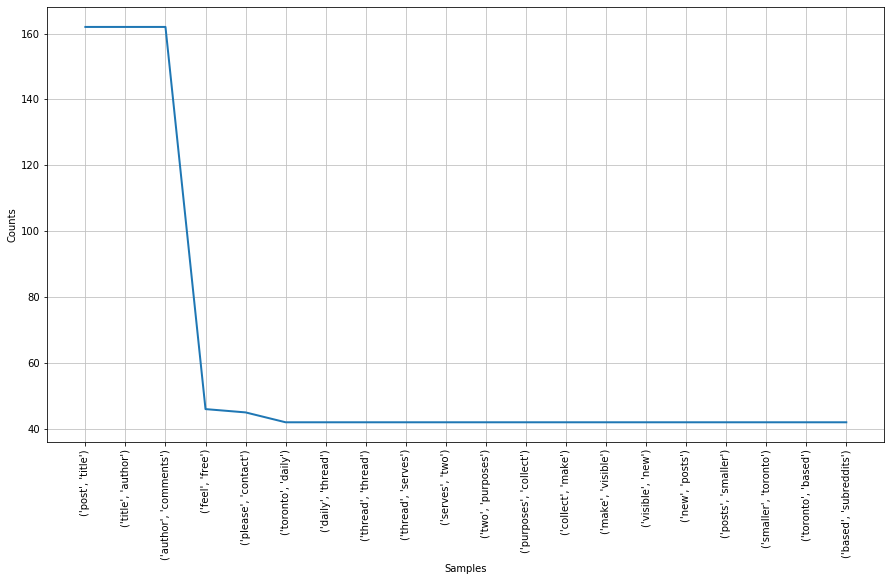

In [237]:
plot_frequency_bigrams(df['selftext'])

In [239]:
df

,subreddit,selftext,title,upvote_ratio,ups,num_comments,subreddit_subscribers
0,toronto,june 14greenpeace new volunteer orientationhtt...,things to do june 13 june 19,0.92,31,16,528060
1,toronto,,storytime urban farming in toronto year 6,0.99,684,109,528060
2,toronto,,a reminder to clean your lint traps and exhausts,0.96,655,98,528060
3,toronto,,rooftop fire in townhouse complex yonge401,0.98,159,32,528060
4,toronto,,some hand drawn toronto map art i did a little...,0.99,1083,49,528060
...,...,...,...,...,...,...,...
1244,toronto,,huge respect to this guy working at a construc...,0.98,2415,96,528062
1245,toronto,,an avocado truck caught fire on a major highwa...,0.67,20,25,528062
1246,toronto,,fixing torontos housing crisis municipal worl...,0.50,0,0,528062
1247,toronto,,power outage in the middle of a no frills on g...,0.95,671,145,528062


# Topic Modeling

One of the primary applications of natural language processing is to automatically extract what topics people are discussing from large volumes of text.

In [259]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [242]:
# combine two columns together
df['text'] = df['title'] + ' ' + df['selftext']

In [243]:
df

,subreddit,selftext,title,upvote_ratio,ups,num_comments,subreddit_subscribers,text
0,toronto,june 14greenpeace new volunteer orientationhtt...,things to do june 13 june 19,0.92,31,16,528060,things to do june 13 june 19 june 14greenpeac...
1,toronto,,storytime urban farming in toronto year 6,0.99,684,109,528060,storytime urban farming in toronto year 6
2,toronto,,a reminder to clean your lint traps and exhausts,0.96,655,98,528060,a reminder to clean your lint traps and exhausts
3,toronto,,rooftop fire in townhouse complex yonge401,0.98,159,32,528060,rooftop fire in townhouse complex yonge401
4,toronto,,some hand drawn toronto map art i did a little...,0.99,1083,49,528060,some hand drawn toronto map art i did a little...
...,...,...,...,...,...,...,...,...
1244,toronto,,huge respect to this guy working at a construc...,0.98,2415,96,528062,huge respect to this guy working at a construc...
1245,toronto,,an avocado truck caught fire on a major highwa...,0.67,20,25,528062,an avocado truck caught fire on a major highwa...
1246,toronto,,fixing torontos housing crisis municipal worl...,0.50,0,0,528062,fixing torontos housing crisis municipal worl...
1247,toronto,,power outage in the middle of a no frills on g...,0.95,671,145,528062,power outage in the middle of a no frills on g...


In [245]:
from sklearn.feature_extraction.text import CountVectorizer

In [248]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [249]:
text = cv.fit_transform(df['text'])

In [251]:
from sklearn.decomposition import LatentDirichletAllocation

In [253]:
LDA = LatentDirichletAllocation(n_components=7, random_state=42)

In [254]:
LDA.fit(text)

LatentDirichletAllocation(n_components=7, random_state=42)

In [255]:
single_topic = LDA.components_[0]

In [256]:
single_topic.argsort()[-10:]

array([2336, 4120, 1724,  648,  999,  765, 1672, 2636, 1946, 3546])

In [258]:
top_ten_words = single_topic.argsort()[-10:]
for index in top_ten_words:
    print(cv.get_feature_names()[index])

need
week
home
canadian
day
city
help
police
just
toronto


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [269]:
# Convert to list
data = df.text.values.tolist()

In [270]:
def sent_to_words(sentences):
    for sentence in sentences:
        #simple_preprocess- Convert a document into a list of tokens.
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [271]:
data_words=list(sent_to_words(data))

In [273]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [282]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [283]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [276]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data_words_nostops = remove_stopwords(data_words)


In [284]:
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [285]:
data_lemmatized

[['thing',
  'new',
  'volunteer',
  'identity',
  'expression',
  'historic',
  'interior',
  'reference',
  'craft',
  'blue',
  'jay',
  'oriole',
  'science',
  'drag',
  'opera',
  'show',
  'bar',
  'kingdom',
  'tour',
  'maverick',
  'city',
  'music',
  'blue',
  'tail',
  'trivia',
  'stout',
  'district',
  'victory',
  'various',
  'program',
  'history',
  'museum',
  'free',
  'plant',
  'free',
  'museum',
  'end',
  'end',
  'night',
  'remember',
  'bader',
  'comedy',
  'second',
  'city',
  'show',
  'tix',
  'select',
  'bar',
  'club',
  'ttuesday',
  'night',
  'oasis',
  'aqua',
  'casino',
  'bus',
  'niagara',
  'guide',
  'path',
  'system',
  'skate',
  'bike',
  'brigade',
  'continue',
  'jam',
  'sport',
  'league',
  'circle',
  'free',
  'bystander',
  'intervention',
  'legacy',
  'ride',
  'httpstbncaevent',
  'group',
  'bike',
  'ride',
  'poolbilliard',
  'blue',
  'jay',
  'oriole',
  'panther',
  'free',
  'baseball',
  'christie',
  'opera',
  'b

In [286]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [331]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [332]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.035*"go" + 0.024*"downtown" + 0.017*"year" + 0.014*"plan" + 0.013*"look" + 0.013*"find" + 0.013*"public" + 0.012*"park" + 0.012*"cat" + 0.012*"vote"'), (1, '0.036*"ttc" + 0.032*"man" + 0.021*"remain" + 0.020*"ontario" + 0.020*"suspect" + 0.020*"summer" + 0.018*"include" + 0.017*"station" + 0.017*"charge" + 0.015*"canadian"'), (2, '0.023*"bike" + 0.020*"back" + 0.019*"change" + 0.018*"take" + 0.016*"want" + 0.016*"people" + 0.015*"ride" + 0.013*"stop" + 0.013*"city" + 0.013*"say"'), (3, '0.027*"today" + 0.021*"start" + 0.019*"price" + 0.019*"photo" + 0.017*"beach" + 0.017*"front" + 0.016*"weekend" + 0.016*"head" + 0.015*"location" + 0.014*"high"'), (4, '0.037*"time" + 0.026*"case" + 0.025*"government" + 0.023*"market" + 0.022*"gta" + 0.019*"follow" + 0.019*"police" + 0.015*"great" + 0.015*"trip" + 0.014*"officer"'), (5, '0.041*"bus" + 0.038*"housing" + 0.020*"black" + 0.019*"shoot" + 0.017*"toronto" + 0.017*"open" + 0.016*"neighbourhood" + 0.016*"storm" + 0.014*"return" + 0.014*

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [333]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [335]:
get_lda_topics(lda_model, 10)


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,go,ttc,bike,today,time,bus,call,get,street,post
1,downtown,man,back,start,case,housing,project,close,building,comment
2,year,remain,change,price,government,black,highway,first,amp,title
3,plan,ontario,take,photo,market,shoot,future,car,free,author
4,look,suspect,want,beach,gta,toronto,fall,city,online,comedy
5,find,summer,people,front,follow,open,condo,right,arrest,good
6,public,include,ride,weekend,police,neighbourhood,service,s,show,ticket
7,park,station,stop,head,great,storm,fast,news,power,thread
8,cat,charge,city,location,trip,return,go,come,blue,remember
9,vote,canadian,say,high,officer,report,name,help,hour,sell


In [336]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.018202018194014

Coherence Score:  0.47915781212392927


In [337]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [338]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.336138 -0.143882       1        1  39.339152
0      0.138678  0.309306       2        1  11.808723
2     -0.039698 -0.019112       3        1  10.681532
7     -0.005136 -0.100249       4        1  10.015668
8     -0.058187 -0.069676       5        1   6.318302
3     -0.064591  0.002698       6        1   5.405705
5     -0.101587 -0.054660       7        1   5.252714
6     -0.059953  0.020921       8        1   3.937691
4     -0.072936  0.033315       9        1   3.875029
1     -0.072727  0.021339      10        1   3.365484, topic_info=         Term        Freq       Total Category  logprob  loglift
237      post  348.000000  348.000000  Default  30.0000  30.0000
290        go  129.000000  129.000000  Default  29.0000  29.0000
650   comment  210.000000  210.000000  Default  28.0000  28.0000
436       get  126.000000  126.000000  Default  27.0000  27.0000
718     title  165.000000  165.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
494    subway    8.039701   14.405161  Topic10  -4.4597   2.8084
247   station   12.146888   31.596685  Topic10  -4.0470   2.4356
314   transit    8.095631   19.765825  Topic10  -4.4528   2.4990
1251    offer    4.716492    9.365740  Topic10  -4.9930   2.7056
323      face    4.848543   15.909846  Topic10  -4.9654   2.2033

[433 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
159       3  0.978927        able
2207     10  0.823753          ad
859       9  0.856985  additional
162       3  0.985268     advance
2006      2  0.942810  affordable
...     ...       ...         ...
763       1  0.184344        work
763       2  0.553031        work
763       4  0.237013        work
1592     10  0.872293      worker
142       2  0.973525        year

[496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 3, 8, 9, 4, 6, 7, 5, 2])

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.



# Non-Negative Matrix Factorization (NMF) 

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

Using the original matrix (A), NMF will give you two matrices (W and H). W is the topics it found and H is the coefficients (weights) for those topics. In other words, A is articles by words (original), H is articles by topics and W is topics by words.

In [366]:
sentences = [' '.join(text) for text in data_lemmatized]


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [376]:
# obtain a Counts design matrix
vectorizer = CountVectorizer(analyzer='word', max_features=3000);
x_counts = vectorizer.fit_transform(sentences);

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [377]:
# set a TfIdf transformer, and transfer the counts with the model.
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

transformer = TfidfTransformer()
x_tfidf = transformer.fit_transform(x_counts);

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [378]:
from sklearn.preprocessing import normalize

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [383]:
num_topics = 10
model = NMF(n_components=num_topics, init='nndsvd');
model.fit(tfidf)

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(init='nndsvd', n_components=10)

In [384]:
## Get words from each topic 
def get_nmf_topics(model, n_top_words):
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [385]:
get_nmf_topics(model, 10)

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,inadvertently,living,identify,owner,critically,half,fairly,injure,nba,low
1,budgie,blanket,fountain,flatfooted,lawsuit,clothing,grow,elderly,materialize,purpose
2,ampx,diet,guess,party,literally,cloud,fallwinter,friendly,hero,current
3,owefound,obstacle,materialize,bond,evaluation,municipal,private,demonstrate,peel,outdoor
4,analysis,hippest,berczy,politician,mainly,impersonate,condominium,demerit,corporate,currently
5,index,letter,damage,much,cruise,health,policy,electoral,lifethreatene,description
6,overhaul,base,alone,inperson,litre,hall,promote,dismiss,outfit,bcute
7,breed,complex,bathroom,msg,down,follow,file,collar,girl,generally
8,direct,heart,plant,boy,polling,harbourfront,original,formula,casino,banana
9,option,annual,grind,obstacle,main,argument,fame,hair,allege,connect


In [387]:
CoherenceModel(
    model=nmf,
    corpus=xtfidf_norm,
    coherence='u_mass'
).get_coherence()

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'NMF' object has no attribute 'id2word'